In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax.numpy as jnp
from jax import grad, vmap
import jax
import jax.random as jrandom
import matplotlib.pyplot as plt
from utils import prepare_data
from models import *
from advi import *
import numpy as np 
import  jax.scipy.stats as stats

## Faces Experiments 

In [ ]:
from scipy.io import loadmat
rank = 10
all_data = loadmat("data/frey_rawface.mat")
data = all_data["ff"].T
data = jrandom.permutation(jrandom.key(1234),data, axis=0)[:28]
nmf_model = old_NMF_Model_PoissonDirExp(data, rank,dir_prior=1000, exp_prior=.1) 
nmf_advi = mean_field_advi(nmf_model)
k = jrandom.key(10)
nmf_advi.run_advi(k, 3 ,50000,0.02, 
                  print_every=1000, adaptive=True, alpha=0.7, rmsprop=True)

thetas, betas = nmf_model.t_inv_map(nmf_advi.params["mu"])

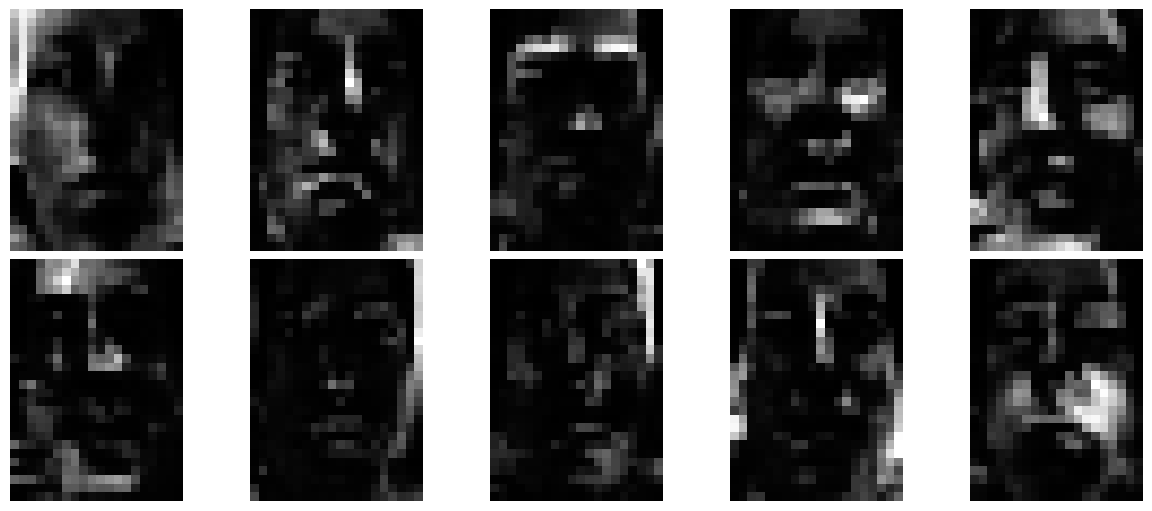

In [6]:

fig, axs = plt.subplots(2, 5, figsize=(12, 5), constrained_layout=True)
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
plt.savefig("dirichlet.pdf")

-742236600.0
-741792200.0


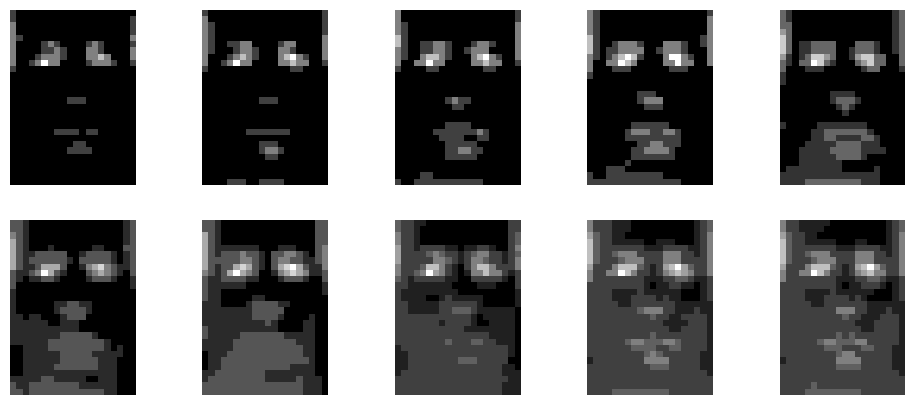

In [12]:
nmf_advi.run_advi(k, 10,1000, 1e-4, 
                  print_every=500, adaptive=True, alpha=0.5, rmsprop=False)

thetas, betas = nmf_model.t_inv_map(nmf_advi.params["mu"])
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    

-742236350.0
-741792060.0


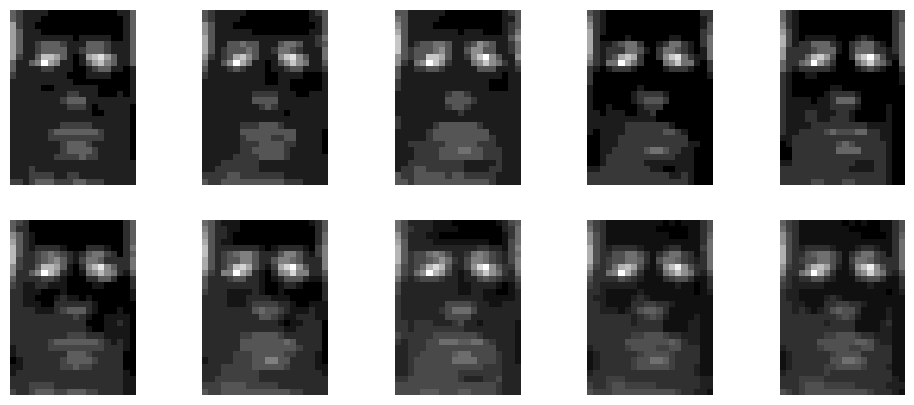

In [14]:
nmf_advi.run_advi(k, 10,1000, 1e-4, 
                  print_every=500, adaptive=True, alpha=0.5, rmsprop=False)

thetas, betas = nmf_model.t_inv_map(nmf_advi.params["mu"])
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(data[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")

In [ ]:
nmf_advi.run_advi(k, 10, 50001, 1e-3, 
                  print_every=500, adaptive=True, alpha=0.99, rmsprop=True)

thetas, betas = nmf_model.t_inv_map(nmf_advi.params["mu"])
u = 42
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")

In [ ]:
from copy import deepcopy
old_params = deepcopy(nmf_advi.params)

In [ ]:
# nmf_advi.params = deepcopy(old_params)
nmf_advi.params = deepcopy(old_params)
nmf_advi.run_advi(k, 20, 1501,5e-5, print_every=500, adaptive=False)
thetas, betas = nmf_model.t_inv_map(old_params["mu"])
 
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(betas[i].reshape(28, 20), cmap="gray")
    axs[i].axis("off")
    